In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import sys
sys.path.append('..')

In [15]:
from src.data.datasets import ClassImagesSet, MetaDataset

In [16]:
from src.data.dataset_managers import MetaDataLoader

In [17]:
train_classes = ClassImagesSet('/home/oscarli/projects/meta-analysis-classification/data/tiered-imagenet_new/base.json',
                               preload=False)

loading image paths, labels from json  /home/oscarli/projects/meta-analysis-classification/data/tiered-imagenet_new/base.json


In [19]:
for cl in train_classes.items():
    print(cl)

(0, <src.data.datasets.ClassImages object at 0x7f5bab796a90>)
(1, <src.data.datasets.ClassImages object at 0x7f5bab79f810>)
(2, <src.data.datasets.ClassImages object at 0x7f5bab7af650>)
(3, <src.data.datasets.ClassImages object at 0x7f5bab7af610>)
(4, <src.data.datasets.ClassImages object at 0x7f5bab7af5d0>)
(5, <src.data.datasets.ClassImages object at 0x7f5bab7af750>)
(6, <src.data.datasets.ClassImages object at 0x7f5bab7af7d0>)
(7, <src.data.datasets.ClassImages object at 0x7f5bab7af8d0>)
(8, <src.data.datasets.ClassImages object at 0x7f5bab7af6d0>)
(9, <src.data.datasets.ClassImages object at 0x7f5bab7af890>)
(10, <src.data.datasets.ClassImages object at 0x7f5bab7af790>)
(11, <src.data.datasets.ClassImages object at 0x7f5bab7af910>)
(12, <src.data.datasets.ClassImages object at 0x7f5bab7af690>)
(13, <src.data.datasets.ClassImages object at 0x7f5bab7af710>)
(14, <src.data.datasets.ClassImages object at 0x7f5bab7af950>)
(15, <src.data.datasets.ClassImages object at 0x7f5bab7af990>)
(1

In [20]:
train_meta_dataset = MetaDataset(
                        dataset_name='tiered-imagenet_new',
                        support_class_images_set=train_classes,
                        query_class_images_set=train_classes,
                        image_size=84,
                        support_aug=True, query_aug=True,
                        fix_support=0, save_folder='.', 
                        fix_support_path='')

No. of classes in set support 351                 query 351
Support set is fixed: False
support aug: True query aug: True
Setting support loader for class 0 using 1040 images from class
Setting support loader for class 1 using 1040 images from class
Setting support loader for class 2 using 1040 images from class
Setting support loader for class 3 using 1040 images from class
Setting support loader for class 4 using 1040 images from class
Setting support loader for class 5 using 1040 images from class
Setting support loader for class 6 using 1040 images from class
Setting support loader for class 7 using 1040 images from class
Setting support loader for class 8 using 1040 images from class
Setting support loader for class 9 using 1040 images from class
Setting support loader for class 10 using 1040 images from class
Setting support loader for class 11 using 1040 images from class
Setting support loader for class 12 using 1040 images from class
Setting support loader for class 13 using 1

In [21]:
train_meta_dataset.support_sub_dataloader[0].cl

0

In [22]:
task_class_info = {
    'task_idx': 2,
    'cl': 0,
    'n_shot': 5,
    'n_query': 16,
    'cl_label': 3,
}
train_meta_dataset[task_class_info].keys()

dict_keys(['task_idx', 'cl', 'support_x_cl', 'support_y_cl', 'query_x_cl', 'query_y_cl'])

In [23]:
print(train_meta_dataset[task_class_info]['task_idx'])
print(train_meta_dataset[task_class_info]['cl'])
print(train_meta_dataset[task_class_info]['support_x_cl'].shape)
print(train_meta_dataset[task_class_info]['support_y_cl'].shape)
print(train_meta_dataset[task_class_info]['query_x_cl'].shape)
print(train_meta_dataset[task_class_info]['query_y_cl'].shape)
print(train_meta_dataset[task_class_info]['support_y_cl'])
print(train_meta_dataset[task_class_info]['query_y_cl'])

2
0
torch.Size([5, 3, 84, 84])
torch.Size([5])
torch.Size([16, 3, 84, 84])
torch.Size([16])
tensor([3, 3, 3, 3, 3])
tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])


In [24]:
def chw2hwc(img):
    return np.transpose(a=img, axes=(1,2,0))

In [25]:
import numpy as np
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


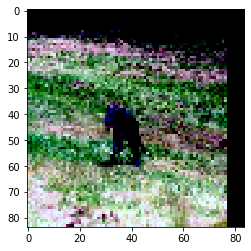

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


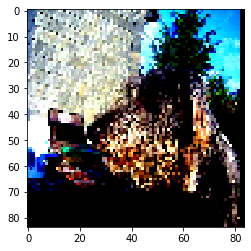

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


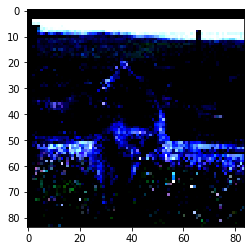

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


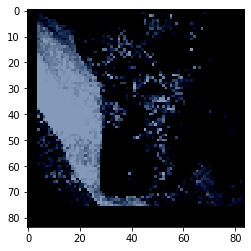

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


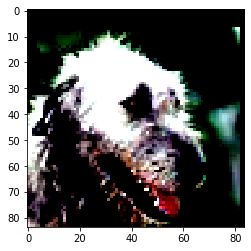

In [28]:
support = train_meta_dataset[task_class_info]['support_x_cl']
for i in range(5):
    plt.imshow(chw2hwc(support[i].numpy()))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


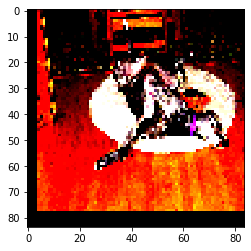

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


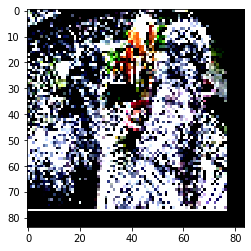

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


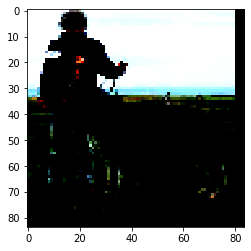

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


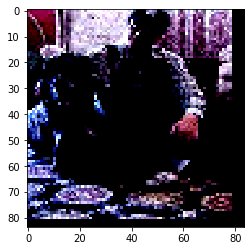

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


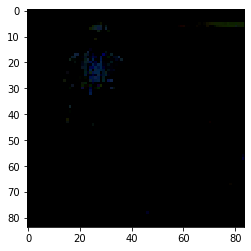

In [27]:
support = train_meta_dataset[task_class_info]['query_x_cl']
for i in range(5):
    plt.imshow(chw2hwc(support[i].numpy()))
    plt.show()

In [16]:
train_loader = MetaDataLoader(
                    dataset=train_meta_dataset,
                    n_batches=200,
                    batch_size=4,
                    n_way=5,
                    n_shot=5,
                    n_query=15,
                    randomize_query=True)

Size of Support: 5
Size of Query: 15 randomize query True
Setting an episodic sampler over classes
(0, 0.002849002849002849)
(1, 0.002849002849002849)
(2, 0.002849002849002849)
(3, 0.002849002849002849)
(4, 0.002849002849002849)
(5, 0.002849002849002849)
(6, 0.002849002849002849)
(7, 0.002849002849002849)
(8, 0.002849002849002849)
(9, 0.002849002849002849)
(10, 0.002849002849002849)
(11, 0.002849002849002849)
(12, 0.002849002849002849)
(13, 0.002849002849002849)
(14, 0.002849002849002849)
(15, 0.002849002849002849)
(16, 0.002849002849002849)
(17, 0.002849002849002849)
(18, 0.002849002849002849)
(19, 0.002849002849002849)
(20, 0.002849002849002849)
(21, 0.002849002849002849)
(22, 0.002849002849002849)
(23, 0.002849002849002849)
(24, 0.002849002849002849)
(25, 0.002849002849002849)
(26, 0.002849002849002849)
(27, 0.002849002849002849)
(28, 0.002849002849002849)
(29, 0.002849002849002849)
(30, 0.002849002849002849)
(31, 0.002849002849002849)
(32, 0.002849002849002849)
(33, 0.0028490028490

In [17]:
for data in train_loader:
    break

In [18]:
type(data)
len(data)

4

In [19]:
data[0].shape

torch.Size([4, 25, 3, 84, 84])

In [20]:
data[1] # support labels

tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2,
         2],
        [4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0,
         0],
        [3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 4, 4, 4, 4,
         4],
        [3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4, 4, 4, 4,
         4]])

In [21]:
import time
from tqdm import tqdm

In [22]:
time_points = [time.time()]
for i, data in enumerate(train_loader):
    time_points.append(time.time())

In [23]:
import matplotlib.pyplot as plt

In [24]:
import numpy as np

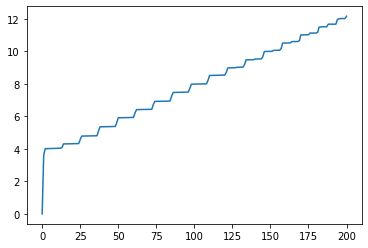

In [25]:
plt.plot(list(range(len(time_points))), np.array(time_points) - time_points[0])

In [26]:
(time_points[200] - time_points[25]) / (200 - 25)

0.04337101800101144

In [27]:
data[1].shape

torch.Size([4, 25])